## Data Engineering

In [2]:
import pandas as pd 

In [28]:
df = pd.read_csv('NC_policing (3).csv')
df.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NC,2000-08-09,M,37.0,W N,White,Other,No Search Conducted,False,Arrest,No Search Conducted,11336,NaN,H1
496,NC,2000-08-09,M,32.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,11261,NaN,B5
497,NC,2000-08-09,F,28.0,W N,White,Registration/plates,Incident to Arrest,False,Arrest,Other Official Info,11326,NaN,F5
498,NC,2000-08-09,M,39.0,W N,White,Speeding,Incident to Arrest,False,Arrest,Suspicious Movement,10988,NaN,C1


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: state
Unique Values: ['NC']

Column: stop_date
Unique Values: ['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']

Column: driver_gender
Unique Values: ['M' 'F']

Column: driver_age
Unique Values: [23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]

Column: driver_race_raw
Unique Values: ['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']

Column: driver_race
Unique Values: ['White' 'Black' 'Hispanic' 'Other' 'Asian']

Column: violation
Unique Values: ['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']

Column: search_type
Unique Values: ['No Search Conducted' 'Protective Frisk' 'Incident to Arre

In [5]:
nan_count = df['drugs_related_stop'].isna().sum()

print(f"Number of rows with NaN values in 'drugs_related_stop' column: {nan_count}")

Number of rows with NaN values in 'drugs_related_stop' column: 397708


In [6]:
df.drop('state', axis=1, inplace=True)


In [7]:
df['driver_gender'].replace({'M': 1, 'F': 0}, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['driver_race_raw'] = label_encoder.fit_transform(df['driver_race_raw'])

In [9]:
race_mapping = {
    'White': 0,
    'Black': 1,
    'Hispanic': 2,
    'Other': 3,
    'Asian': 4
}

df['driver_race'] = df['driver_race'].replace(race_mapping)

In [10]:
search_rank_mapping = {
    'No Search Conducted': 6,                
    'Protective Frisk': 5,                      
    'Incident to Arrest': 4,                
    'Consent': 3,                
    'Probable Cause': 2,                    
    'Warrant': 1,      
           
}
df['search_type'] = df['search_type'].map(search_rank_mapping)

In [11]:
violation_rank_mapping = {
    'Speeding': 6,                
    'DUI': 8,                      
    'Equipment': 2,                
    'Seat belt': 3,                
    'Other': 1,                    
    'Registration/plates': 7,      
    'Safe movement': 4,            
    'Stop sign/light': 5           
}
 
df['violation'] = df['violation'].map(violation_rank_mapping)

In [12]:
value_rank = {
    value: rank for rank, value in enumerate(df['search_basis'].unique())
}

df['search_basis'] = df['search_basis'].map(value_rank)

In [13]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['year'] = df['stop_date'].dt.year
df['month'] = df['stop_date'].dt.month
df['day_of_week'] = df['stop_date'].dt.dayofweek

In [14]:
df.drop('district', axis=1, inplace=True)
df.drop('officer_id', axis=1, inplace=True)
df.drop('drugs_related_stop', axis=1, inplace=True)
df.drop('stop_date', axis=1, inplace=True)

In [15]:
df['stop_outcome'].replace({'Arrest': 1, 'No Action': 0}, inplace=True)
df['contraband_found'].replace({'True': 1, 'False': 0}, inplace=True)

In [25]:
df = df.dropna()
df.head(100)

,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,year,month,day_of_week
0,1,23.0,9,0,6,6,False,1,0,2000,7,0
1,0,29.0,9,0,6,6,False,1,0,2000,7,0
2,0,49.0,3,1,6,6,False,1,0,2000,7,0
3,1,29.0,3,1,6,6,False,1,0,2000,7,0
4,1,24.0,6,2,6,6,False,1,0,2000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,36.0,9,0,6,6,False,1,0,2000,8,3
96,1,21.0,9,0,6,6,False,1,0,2000,8,3
97,1,51.0,9,0,5,6,False,1,0,2000,8,3
98,0,21.0,9,0,7,6,False,1,0,2000,8,3


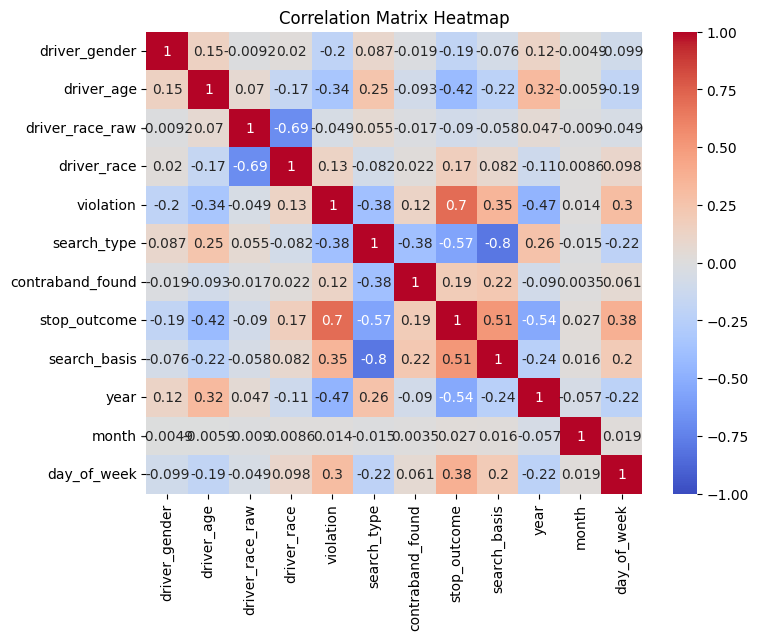

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Simple Model

Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

X = df.drop('stop_outcome', axis=1)  
y = df['stop_outcome']  
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.95147
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     55514
           1       0.94      0.96      0.95     55775

    accuracy                           0.95    111289
   macro avg       0.95      0.95      0.95    111289
weighted avg       0.95      0.95      0.95    111289



Confusion Matrix:
 [[52299  3215]
 [ 2186 53589]]


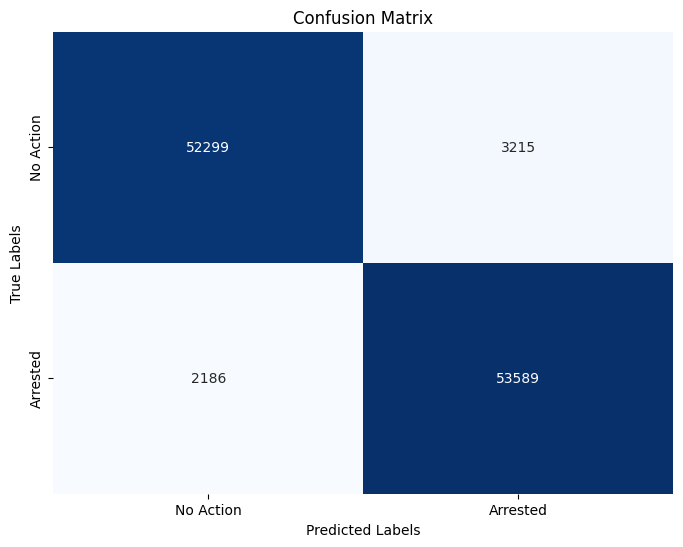

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
labels=['No Action','Arrested']
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Simple_confusion_matrix.png')
plt.show()

In [20]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf_classifier, pickle_out)
pickle_out.close()

KNeighborsClassifier

In [21]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


 
svm_classifier = KNeighborsClassifier(n_neighbors=7)

svm_classifier.fit(X_train, y_train)

 
y_pred = svm_classifier.predict(X_test)

# Evaluate the best estimator
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Estimator: {accuracy:.5f}')


Accuracy with Best Estimator: 0.93341


Confusion Matrix:
 [[51368  4146]
 [ 3265 52510]]


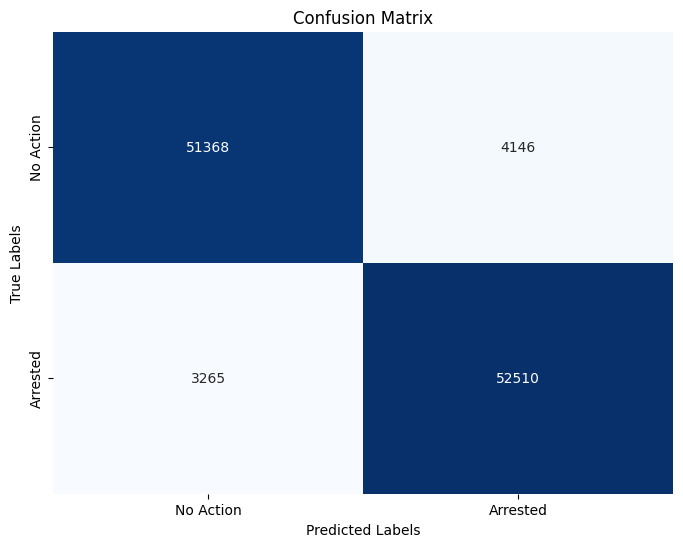

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
labels=['No Action','Arrested']
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('Simple_confusion_matrix.png')
plt.show()

## Stacking

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create two Random Forest classifiers
rf_classifier1 = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier2 = RandomForestClassifier(n_estimators=150, random_state=42)
clf1 = xgb.XGBClassifier(n_estimators=50,random_state=42)
clf2= LogisticRegression(random_state=42,max_iter=50)

estimators = [('m1', rf_classifier1),('m2', rf_classifier2) ,('m4', rf_classifier2),('m5', clf2),('m6', clf1)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(n_estimators=50,random_state=42))

 
stacking_classifier.fit(X_train, y_train)

 
y_pred = stacking_classifier.predict(X_test)

 
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print('Classification Report:\n', classification_rep)


KeyboardInterrupt: 

Confusion Matrix:
 [[53127  2387]
 [ 2457 53318]]


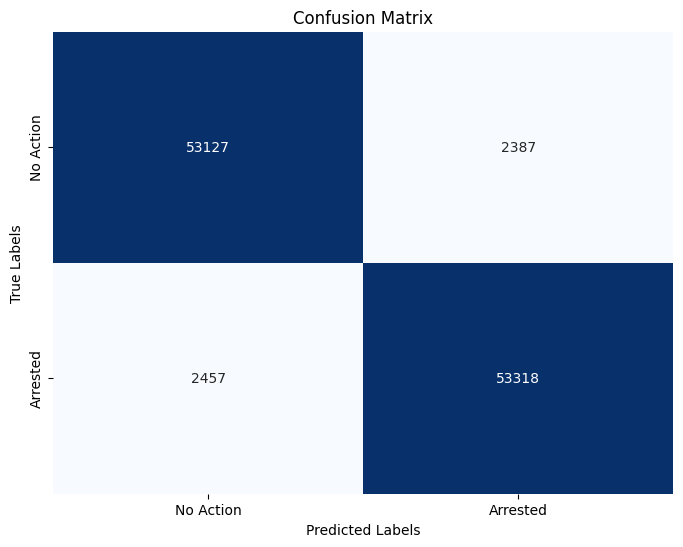

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
labels=['No Action','Arrested']
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('stacked_confusion_matrix.png')
plt.show()